In [1]:
import numpy as np
import os

In [2]:
from IPython.display import clear_output
from IPython.core.display import HTML
HTML("<style>.container { width:98% !important; }</style>")
os.chdir('../')

In [3]:
from datasets.mpro import Mpro

In [4]:
subsets = ["train", "test", "train_random", "test_random"]
input_type = "graph"

configs = {
    "input_type": input_type,
    "max_atoms": 2000,
}

In [5]:
print(os.getcwd())

/usr/WS1/ranganath2/code/fast3


In [6]:
mpro_datas = {subset: Mpro(subset=subset, configs=configs, mode=subset) for subset in subsets}

In [7]:
total = 0
for subset in mpro_datas:
    n = len(mpro_datas[subset])
    print(subset, n)
    total += n
print("all", total)

train 4080
test 4310
train_random 4000
test_random 4410
all 16800


In [8]:
train_labels = [data['data'].y for data in mpro_datas['train']]

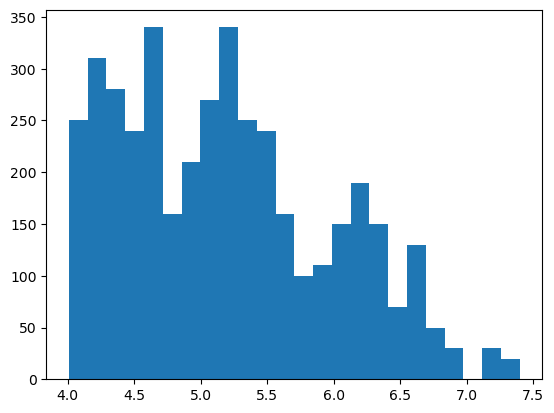

In [9]:
import matplotlib.pyplot as plt
train_labels = np.stack(train_labels)
hist= plt.hist(train_labels.reshape(-1), bins='auto')
plt.show()

In [10]:
from sklearn.neighbors import KernelDensity

In [13]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(train_labels.squeeze(1))

In [18]:
values = kde.sample(n_samples=100000)

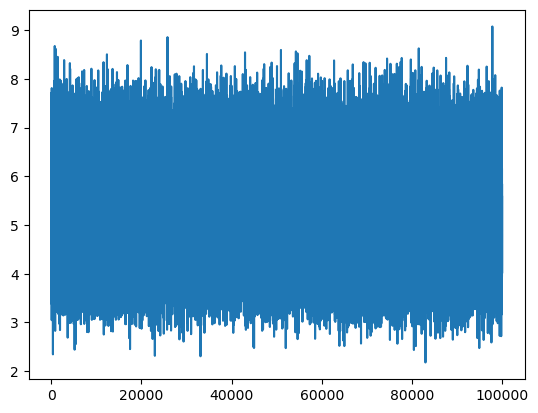

In [19]:
plt.plot(values)

In [27]:
labelDict = {}

for label in train_labels.reshape(-1):
    if float(label) in labelDict:
        labelDict[float(label)]+= 1
    else:
        labelDict[float(label)] = 1

In [30]:
# Change distribution
OldMax, OldMin = max(train_labels), min(train_labels)
OldRange = (OldMax - OldMin)  
NewMax = 12
NewMin = 2
NewRange = (NewMax - NewMin)  
NewValue = (((train_labels - OldMin) * NewRange) / OldRange) + NewMin

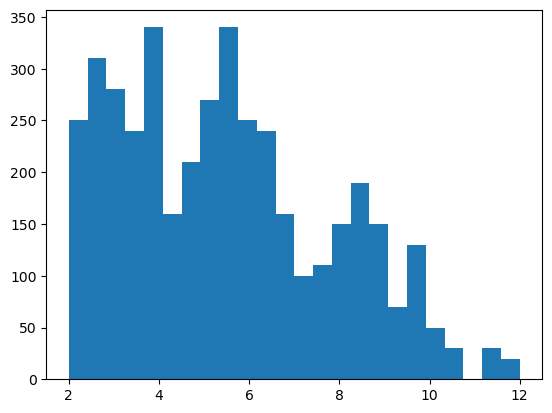

In [33]:
hist= plt.hist(NewValue.reshape(-1), bins='auto')
plt.show()

In [38]:
print(labelDict[list(labelDict.keys())[10]])

10
